In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request

In [2]:
df=pd.read_csv('WDIData.csv')


In [3]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383833,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
383834,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN
383835,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN
383836,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.900000,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.4,NaN


In [4]:
df.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)

In [5]:
df

,Country Name,Country Code,Indicator,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383833,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
383834,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN
383835,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN
383836,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.900000,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.4,NaN


In [6]:
women=df[df.Indicator.str.contains('women', case=False)]

In [7]:
women

,Country Name,Country Code,Indicator,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
48,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,140.120535,140.594564,141.128109,141.32344,141.50816,141.668896,...,105.256166,103.391461,101.541782,99.719799,97.916601,96.146492,94.695223,93.231944,NaN,NaN
87,Africa Eastern and Southern,AFE,Antiretroviral therapy coverage for PMTCT (% o...,SH.HIV.PMTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.595147,82.712634,85.694221,87.334159,87.480641,87.446282,89.038915,90.131889,90.520214,NaN
229,Africa Eastern and Southern,AFE,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,39.685068,NaN,NaN,NaN,NaN
230,Africa Eastern and Southern,AFE,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.420132,NaN,NaN,NaN,NaN
297,Africa Eastern and Southern,AFE,Demand for family planning satisfied by modern...,SH.FPL.SATM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.867209,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383832,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.400000,NaN,NaN,NaN,NaN,NaN,NaN
383833,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
383834,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN
383835,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN


In [8]:
FR=women[women['Country Name']=="France"]

In [9]:
FR

,Country Name,Country Code,Indicator,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
168879,France,FRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,24.917,25.899,26.881,26.8274,26.7738,26.7202,...,6.648000,6.263800,5.879600,5.495400,5.111200,4.727000,4.736200,4.745400,NaN,NaN
168918,France,FRA,Antiretroviral therapy coverage for PMTCT (% o...,SH.HIV.PMTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169060,France,FRA,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169061,France,FRA,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169128,France,FRA,Demand for family planning satisfied by modern...,SH.FPL.SATM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169912,France,FRA,Pregnant women receiving prenatal care (%),SH.STA.ANVC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169918,France,FRA,Prevalence of anemia among non-pregnant women ...,SH.ANM.NPRG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.600000,8.700000,8.900000,9.200000,9.500000,9.800000,10.100000,10.400000,NaN,NaN
169919,France,FRA,Prevalence of anemia among pregnant women (%),SH.PRG.ANEM,NaN,NaN,NaN,NaN,NaN,NaN,...,14.700000,14.900000,15.100000,15.300000,15.500000,15.800000,16.000000,16.200000,NaN,NaN
169920,France,FRA,Prevalence of anemia among women of reproducti...,SH.ANM.ALLW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.800000,8.900000,9.100000,9.400000,9.700000,10.000000,10.300000,10.600000,NaN,NaN
169976,France,FRA,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.863085,26.863085,26.169844,26.169844,26.169844,38.994801,39.583333,39.688042,39.514731,NaN


In [10]:
FR['Indicator'][170270]
#168879 'Adolescent fertility rate (births per 1,000 women ages 15-19)' OUI
#169060 'Contraceptive prevalence, any methods (% of women ages 15-49)'
#169128 'Demand for family planning satisfied by modern methods (% of married women with demand for family planning)'
#169912 'Pregnant women receiving prenatal care (%)'
#169976 'Proportion of seats held by women in national parliaments (%)' OUI
#169918 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)'
#169979 'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)'
#170261 'Women Business and the Law Index Score (scale 1-100)' OUI 
#170262 'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)'
#170263 'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)'
#170264 'Women who believe a husband is justified in beating his wife (any of five reasons) (%)'
#170270 'Women who were first married by age 15 (% of women ages 20-24)'


'Women who were first married by age 15 (% of women ages 20-24)'

In [11]:
female=df[df.Indicator.str.contains('female', case=False)]
female

,Country Name,Country Code,Indicator,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
5,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Africa Eastern and Southern,AFE,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Africa Eastern and Southern,AFE,"Adolescents out of school, female (% of female...",SE.SEC.UNER.LO.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Africa Eastern and Southern,AFE,"Average working hours of children, study and w...",SL.TLF.0714.SW.FE.TM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Africa Eastern and Southern,AFE,"Average working hours of children, working onl...",SL.TLF.0714.WK.FE.TM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383793,Zimbabwe,ZWE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.180000,NaN,NaN,NaN,NaN,17.900000,NaN,NaN
383798,Zimbabwe,ZWE,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.620000,9.660000,9.640000,9.600000,9.570000,9.460000,9.300000,9.220000,NaN,NaN
383799,Zimbabwe,ZWE,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.810000,NaN,NaN,NaN,NaN,31.410000,NaN,NaN
383816,Zimbabwe,ZWE,"Vulnerable employment, female (% of female emp...",SL.EMP.VULN.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.960001,75.089998,75.339997,75.640002,75.970001,76.579998,77.170002,79.299999,NaN,NaN


In [13]:
#On regarde les indicateurs qui contiennent le terme de "female" pour séelctionner ceux qui peuvent parâitre pertinents
FR1=female[female['Country Name']=="France"]
FR1
FR1.to_excel(r'C:\Users\Ca1000\Desktop\ENSAE\2A\S1\FR1.xlsx')




'"Educational attainment, at least Bachelor\'s or equivalent, population 25+, female (%) (cumulative)\nEducational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)\nEducational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)\nEducational attainment, at least completed primary, population 25+ years, female (%) (cumulative)\nEducational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)\nEducational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)\nEducational attainment, at least Master\'s or equivalent, population 25+, female (%) (cumulative)\nEducational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)'

In [286]:
X=df[df['Indicator']=="Wage and salaried workers, female (% of female employment) (modeled ILO estimate)"]

In [287]:
X1=X[['Country Name','Country Code','Indicator','2019']]

In [288]:
index_with_nan = X1.index[X1.isnull().any(axis=1)]
index_with_nan.shape
X1.drop(index_with_nan,0, inplace=True)
X1.shape

C:\Users\Ca1000\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(235, 4)

In [289]:
X1

,Country Name,Country Code,Indicator,2019
1424,Africa Eastern and Southern,AFE,"Wage and salaried workers, female (% of female...",21.846970
2867,Africa Western and Central,AFW,"Wage and salaried workers, female (% of female...",13.229136
4310,Arab World,ARB,"Wage and salaried workers, female (% of female...",67.419171
5753,Caribbean small states,CSS,"Wage and salaried workers, female (% of female...",74.869912
7196,Central Europe and the Baltics,CEB,"Wage and salaried workers, female (% of female...",85.894675
...,...,...,...,...
378047,Virgin Islands (U.S.),VIR,"Wage and salaried workers, female (% of female...",93.370003
379490,West Bank and Gaza,PSE,"Wage and salaried workers, female (% of female...",77.279999
380933,"Yemen, Rep.",YEM,"Wage and salaried workers, female (% of female...",38.430000
382376,Zambia,ZMB,"Wage and salaried workers, female (% of female...",17.820000


In [214]:
Y=df[df['Indicator']=="GDP per capita (constant 2015 US$)"]

In [215]:
Y1=Y[['Country Name','Country Code','Indicator','2019']]

In [216]:
Y1

,Country Name,Country Code,Indicator,2019
469,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),1499.256275
1912,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),1843.558468
3355,Arab World,ARB,GDP per capita (constant 2015 US$),6206.570758
4798,Caribbean small states,CSS,GDP per capita (constant 2015 US$),10050.327615
6241,Central Europe and the Baltics,CEB,GDP per capita (constant 2015 US$),14823.026908
...,...,...,...,...
377092,Virgin Islands (U.S.),VIR,GDP per capita (constant 2015 US$),NaN
378535,West Bank and Gaza,PSE,GDP per capita (constant 2015 US$),3378.434621
379978,"Yemen, Rep.",YEM,GDP per capita (constant 2015 US$),NaN
381421,Zambia,ZMB,GDP per capita (constant 2015 US$),1348.743220


In [217]:
index_with_nan = Y1.index[Y1.isnull().any(axis=1)]
index_with_nan.shape

(20,)

In [218]:
Y1.drop(index_with_nan,0, inplace=True)
Y1.shape

C:\Users\Ca1000\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(246, 4)

In [219]:
Y1

,Country Name,Country Code,Indicator,2019
469,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),1499.256275
1912,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),1843.558468
3355,Arab World,ARB,GDP per capita (constant 2015 US$),6206.570758
4798,Caribbean small states,CSS,GDP per capita (constant 2015 US$),10050.327615
6241,Central Europe and the Baltics,CEB,GDP per capita (constant 2015 US$),14823.026908
...,...,...,...,...
372763,Vanuatu,VUT,GDP per capita (constant 2015 US$),2882.402195
375649,Vietnam,VNM,GDP per capita (constant 2015 US$),2604.224166
378535,West Bank and Gaza,PSE,GDP per capita (constant 2015 US$),3378.434621
381421,Zambia,ZMB,GDP per capita (constant 2015 US$),1348.743220


In [290]:
Z=Y1.merge(X1, how='inner', on='Country Name')

In [291]:
Z

,Country Name,Country Code_x,Indicator_x,2019_x,Country Code_y,Indicator_y,2019_y
0,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),1499.256275,AFE,"Wage and salaried workers, female (% of female...",21.846970
1,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),1843.558468,AFW,"Wage and salaried workers, female (% of female...",13.229136
2,Arab World,ARB,GDP per capita (constant 2015 US$),6206.570758,ARB,"Wage and salaried workers, female (% of female...",67.419171
3,Caribbean small states,CSS,GDP per capita (constant 2015 US$),10050.327615,CSS,"Wage and salaried workers, female (% of female...",74.869912
4,Central Europe and the Baltics,CEB,GDP per capita (constant 2015 US$),14823.026908,CEB,"Wage and salaried workers, female (% of female...",85.894675
...,...,...,...,...,...,...,...
220,Vanuatu,VUT,GDP per capita (constant 2015 US$),2882.402195,VUT,"Wage and salaried workers, female (% of female...",29.070000
221,Vietnam,VNM,GDP per capita (constant 2015 US$),2604.224166,VNM,"Wage and salaried workers, female (% of female...",41.099998
222,West Bank and Gaza,PSE,GDP per capita (constant 2015 US$),3378.434621,PSE,"Wage and salaried workers, female (% of female...",77.279999
223,Zambia,ZMB,GDP per capita (constant 2015 US$),1348.743220,ZMB,"Wage and salaried workers, female (% of female...",17.820000


In [292]:
X_ = Z.iloc[:,3].values
y_ = Z.iloc[:,6].values

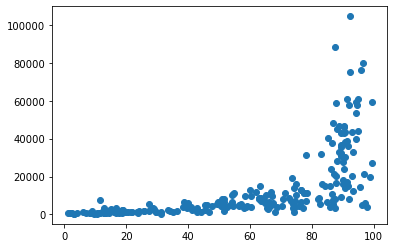

In [293]:
plt.scatter(y_, X_)

plt.show() # affiche la figure a l'ecran

In [ ]:
X_=X_.reshape(len(X_),1)
y_=y_.reshape(len(y_),1)

# Split the data into training/testing sets
X_train = X_[:-25]
X_test = X_[-25:]

# Split the targets into training/testing sets
y_train = y_[:-25]
y_test = y_[-25:]

# Plot outputs
plt.scatter(y_test, X_test,  color='black')
plt.xticks(())
plt.yticks(())

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(y_train, X_train)

# Plot outputs
plt.plot(y_test, regr.predict(y_test), color='red',linewidth=3)

In [ ]:
url_tx_fecond = "https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate"
request_text = request.urlopen(url_tx_fecond).read()
type(request_text)
page = bs4.BeautifulSoup(request_text, "lxml")
print(page)

In [ ]:
page.find("table")

In [ ]:
tableau_fecond = page.find('table', {'class' : 'wikitable sortable'})
tableau_fecond

In [ ]:
table_body = tableau_fecond.find('tbody')

# on recherche toutes les lignes du tableau avec la balise "tr"
rows = table_body.find_all('tr')

print(rows[0])

In [ ]:
print(rows[1])

In [ ]:
cols = rows[1].find_all('td')
print(cols[1])

In [ ]:
print(cols[1].text.strip())

In [ ]:
for ele in cols : 
    print(ele.text.strip())

In [ ]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

In [ ]:
dico_pays = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_pays[cols[1]] = cols[2:]
dico_pays

In [ ]:
data_natalité = pandas.DataFrame.from_dict(dico_pays,orient='index')
data_natalité.head()

In [ ]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_pays = cols

In [ ]:
columns_pays

In [ ]:
data_natalité.columns = columns_pays[2:]

In [ ]:
data_natalité.head()

In [ ]:
data_natalité

In [ ]:
#On ajoute un index (je sais par pourquoi ça en a ajouté deux)
data_natalité.reset_index(inplace=True)
data_natalité

In [ ]:
#On renomme la colonne countries pour qu'elle corresponde au dataframe de la Banque mondiale
data_natalité.rename(columns={'index': 'Country Name'}, inplace=True)

In [ ]:
Z["Country Name"]

In [ ]:
data_natalité['Country Name']

In [ ]:
W=data_natalité.merge(Y1, how='inner', on='Country Name')

In [ ]:
W

In [ ]:
W['Country Name'][174]

In [ ]:
Z_ = W.iloc[:,4].values
data_natalité_ = W.iloc[:,1].values

In [ ]:
data_natalité_

In [ ]:
Z_

In [ ]:
plt.scatter(data_natalité_, Z_)

plt.show() # affiche la figure a l'ecran

In [ ]:
#Comment stocker ce qu'on a scrappé sur l'ordinateur sans devoir tout refaire à chaque fois ? 
#Problème simultanéité Github 
#Est ce qu'on peut faire des régressions comme sur stata où on a tous les paramètres (le R,...)
#Est ce qu'on laisse du brouillon ? 
#POur l'orral il faut une présentation 10-15 min pas faire défiler le notebook 
#Evaluation de nos modèles 
#Commnent afficher toutes les lignes 




#Problème du sens dans lequel va la régression, et de si on prend en compte des pourcentages, des ratios,.... !!!!!!

# Résumé des indicateurs pertinents

## Non pertinents 

Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)
- Pertinent du point de vue de la régression mais assez peu de pays qui fonctionnent (37)

Employers, female (% of female employment) (modeled ILO estimate)
- Beaucoup de pays pris en compte mais régressioin étrange 


## Pertinents 
Employment to population ratio, 15+, female (%) (national estimate)
- 127 pays pris en compte

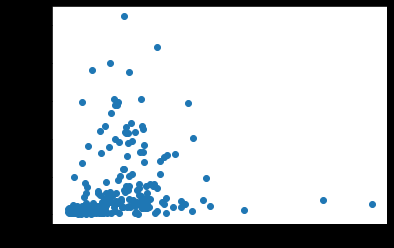